In [1]:
from data.dataset import REFLACXWithClinicalDataset
from model.xami import XAMIMultiModal, XAMIMultiCocatModala

from utils.gradcam import get_df_label_pred_img_input, show_gradCAMpp_result

import torch
import os


In [2]:
# checking if the GPU is available
use_gpu = torch.cuda.is_available()
device = 'cuda' if use_gpu else 'cpu'
print(f"Will be using {device}")

Will be using cuda


In [3]:
# load the dataset
reflacx_dataset = REFLACXWithClinicalDataset(image_size=256)

Positive Loss weight:
[0.768546   0.78635013 0.7937685  0.8338279  0.87388724]
Negative Loss weight:
[0.231454   0.21364985 0.20623146 0.1661721  0.12611276]
Random Loss:
0.21026036153991162


In [4]:
# prepare the model

## Test
# without_clinical_model = 'test_0_8162_epoch300_WithoutClincal_dim32_2022-02-07 21_43_31_353207 '
# with_clinical_model = 'test_0_8161_epoch300_WithClincal_dim32_2022-02-08 00_59_18_812783'
# with_concat_clinical_model = 'test_0_8260__epoch300_WithClincal_dim32_2022-02-08 10_03_56_953198'

## Best Val
# without_clinical_model = 'val_0_8163_epoch14_WithoutClincal_dim32_2022-02-07 18_40_18_536578'
# with_clinical_model = 'val_0_8453_epoch89_WithClincal_dim32_2022-02-07 22_41_31_256273'
# with_concat_clinical_model = 'val_0_8177__epoch10_WithClincal_dim32_2022-02-08 06_53_51_745457'

### PhaseTraining

# orinigal
# without_clinical_model = "test_0_8162_epoch300_WithoutClincal_dim32_2022-02-07 21_43_31_353207"

# before attach
# with_concat_clinical_model = 'test_0_8143__epoch100_WithClincal_dim32_2022-02-08 22_32_57_511233'

# after attach 
with_concat_clinical_model = 'test_0_8224__epoch100_WithClincal_dim32_2022-02-08 23_50_59_899444'

## Without clinical
# xami_mutlimodal = XAMIMultiModal(
#     reflacx_dataset,
#     device,
#     use_clinical=False,
#     model_dim=32, # was 64
#     embeding_dim=64,
#     dropout=.2,  # increase the dropout rate did improve the regularization.
#     pretrained=True
# )
# xami_mutlimodal.load_state_dict(torch.load(os.path.join('saved_models', without_clinical_model ), map_location=device))

## With elementwise sum clinical  
# xami_mutlimodal = XAMIMultiModal(
#     reflacx_dataset,
#     device,
#     use_clinical=True,
#     model_dim=32, # was 64
#     embeding_dim=64,
#     dropout=.2,  # increase the dropout rate did improve the regularization.
#     pretrained=True
# )
# xami_mutlimodal.load_state_dict(torch.load(os.path.join('saved_models', with_clinical_model ), map_location=device))

## With concatenate clinical  
xami_mutlimodal = XAMIMultiCocatModal(
    reflacx_dataset,
    device,
    use_clinical=True,
    model_dim=32, # was 64
    embeding_dim=64,
    dropout=.2,  # increase the dropout rate did improve the regularization.
    pretrained=True
)
xami_mutlimodal.load_state_dict(torch.load(os.path.join('saved_models', with_concat_clinical_model ), map_location=device))


xami_mutlimodal = xami_mutlimodal.to(device)
xami_mutlimodal.eval()

XAMIMultiCocatModal(
  (image_net): ImageDenseNet(
    (model_ft): DenseNet(
      (features): Sequential(
        (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu0): ReLU(inplace=True)
        (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
        (denseblock1): _DenseBlock(
          (denselayer1): _DenseLayer(
            (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (relu1): ReLU(inplace=True)
            (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (relu2): ReLU(inplace=True)
            (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          )
          (denselayer

In [5]:
test_instance_idx = 25

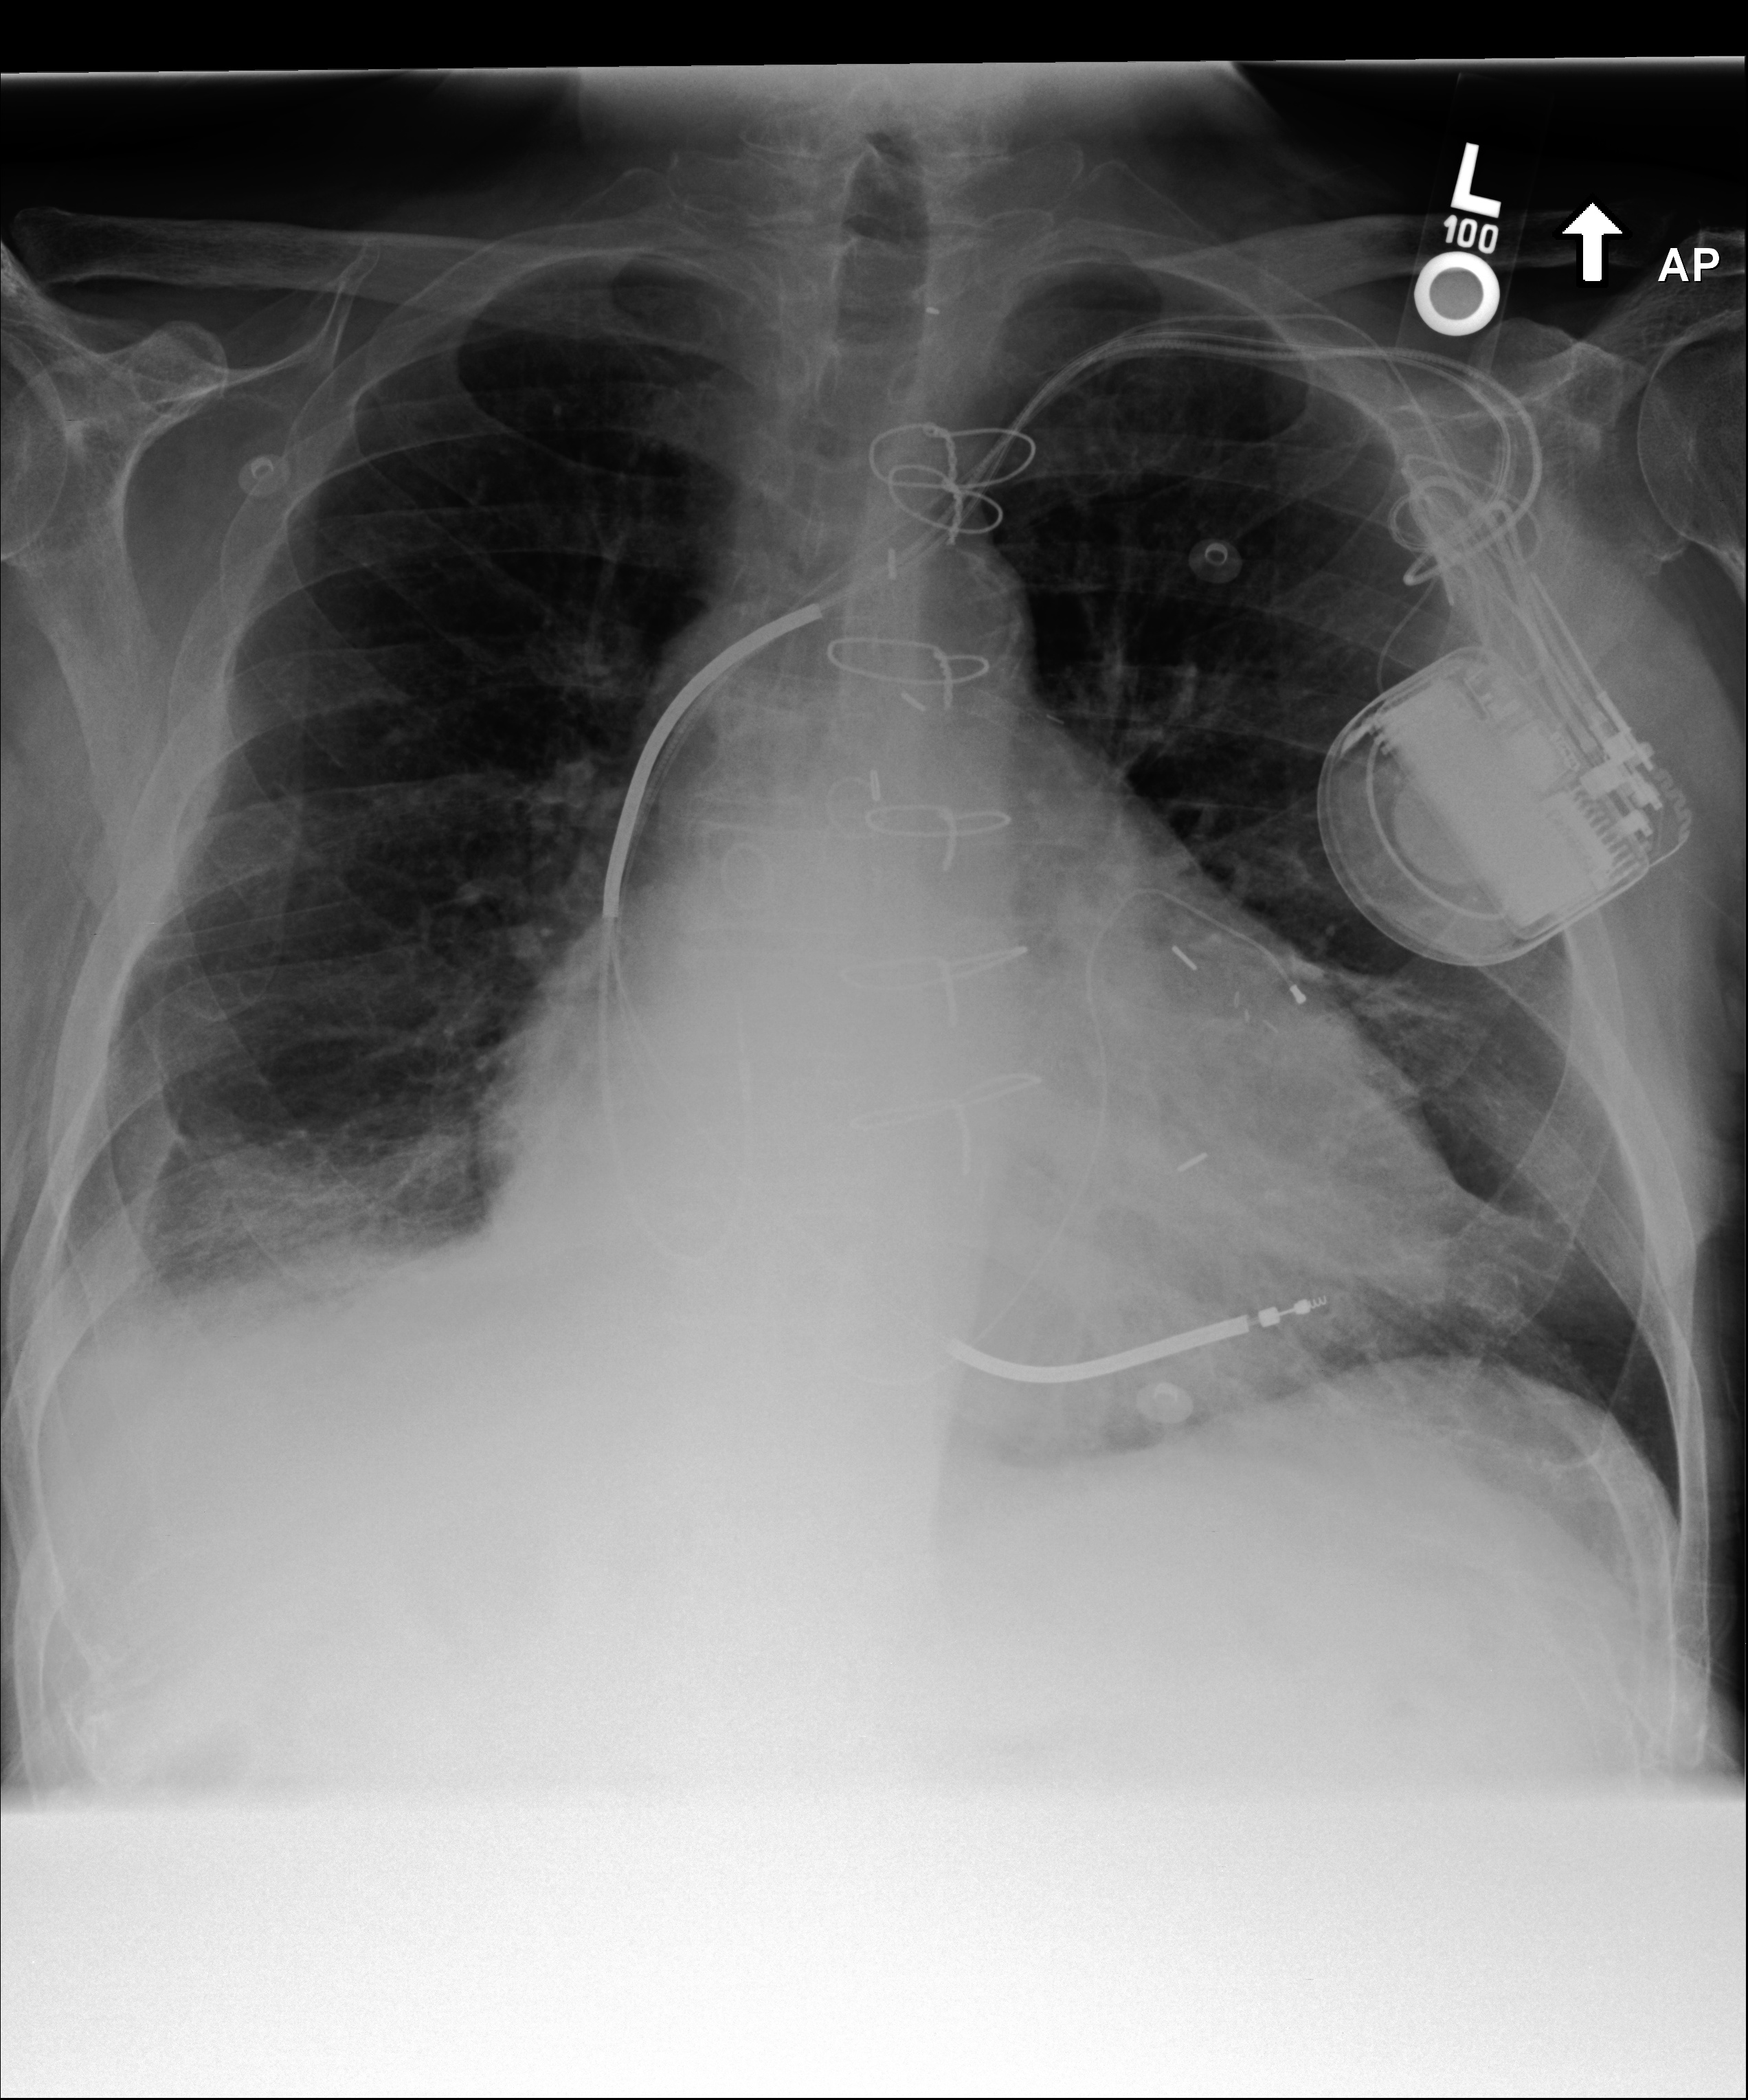

index           id                                      dicom_id  \
0    125  P127R260302  f5bc0fd4-c73df70d-b2760172-59accdb9-161fbc14   

   subject_id   stay_id  study_id  split  \
0    16289699  35986395  55870377  train   

                                          image_path ViewPosition  \
0  D:\XAMI-MIMIC\patient_16289699\CXR-JPG\s558703...           AP   

   image_size_x  ...  Support devices Wide mediastinum  \
0          2544  ...            False            False   

   Abnormal mediastinal contour  Acute fracture  Enlarged hilum  \
0                         False           False           False   

   Hiatal hernia  High lung volume / emphysema  Interstitial lung disease  \
0          False                         False                      False   

   Lung nodule or mass  Pleural abnormality  
0                False                 True  

[1 rows x 42 columns]

Enlarged cardiac silhouette  Atelectasis  Pleural abnormality  \
0                         True         True                 True   

   Consolidation  Pulmonary edema  
0          False            False

Enlarged cardiac silhouette  Atelectasis  Pleural abnormality  \
0                     0.982034     0.993124             0.969473   

   Consolidation  Pulmonary edema  
0       0.971014         0.165785

In [6]:
df, labels_df, pred_df, img, model_input = get_df_label_pred_img_input(
    xami_mutlimodal, reflacx_dataset, test_instance_idx, device)

display(img)
display(df)
display(labels_df)
display(pred_df)

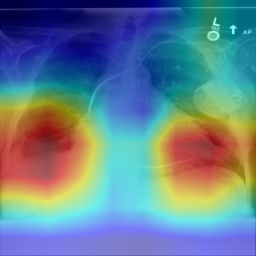

In [7]:
show_gradCAMpp_result(reflacx_dataset, xami_mutlimodal, 'Atelectasis', img, model_input, use_full_features=True)

# Label finding

In [8]:
# reflacx_dataset.df[reflacx_dataset.df['Atelectasis']]
reflacx_dataset.df.index[reflacx_dataset.df['Atelectasis']][:30]

Int64Index([ 70,  71,  72,  73, 106, 125, 126, 128, 129, 136, 137, 138, 139,
            140, 141, 143, 144, 220, 221, 222, 223, 224, 311, 347, 396, 406,
            407, 408, 481, 482],
           dtype='int64')

In [9]:
list(reflacx_dataset.df.index).index(125)

25